In [15]:
import logging
logging.root.setLevel(logging.INFO)


In [16]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [17]:
from utils.xcs_utils import *

In [18]:
exploration_cycles = 4000
exploitation_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ A □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [19]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 1
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = 0.000001               # p_I
algorithm.initial_error = 0.000001            # epsilon_I
algorithm.initial_fitness = 0.000001           # F_I
algorithm.wildcard_probability = 0.0

In [20]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=1,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment


In [21]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,50,50,50
100,50,350,1600
200,28,401,1600
300,50,427,1600
400,50,476,1600
500,50,463,1600
600,50,482,1600
700,50,485,1600
800,50,533,1600


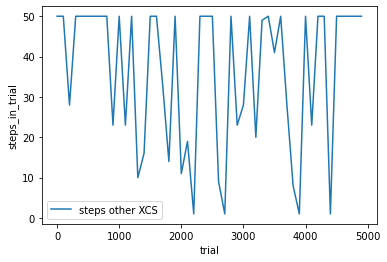

In [22]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

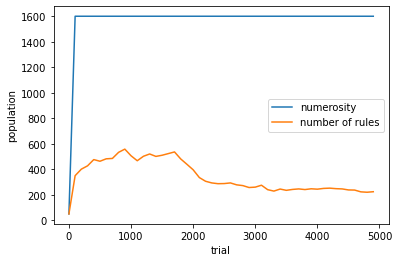

In [23]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [24]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    ga_threshold = 25,
                    metrics_trial_frequency=100,
                    mutation_chance=0.03,
                    chi=1,                           # crossover
                    initial_prediction = 0.000001,               # p_I
                    initial_error = 0.000001,            # epsilon_I
                    initial_fitness = 0.000001,           # F_I
                    delta=0.8, 
                    user_metrics_collector_fcn=xcs_metrics)

In [25]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=3,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 4.431325056160379e-08, 'perf_time': 0.018619200000102865, 'population': 96, 'numerosity': 96}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': 70.46571581800626, 'perf_time': 0.10048000000006141, 'population': 350, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': 44.95473765882148, 'perf_time': 0.1148457999997845, 'population': 377, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': 31.414392043764956, 'perf_time': 0.09751400000004651, 'population': 376, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': 35.12634111253022, 'perf_time': 0.11543780000010884, 'population': 385, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 50, 'reward': 57.30148891193783, 'perf_time': 0.10302550000005795, 'population': 399, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 2400, 'steps_in_trial': 50, 'reward': 94.72723320309514, 'perf_time': 0.09254110000028959, 'population': 359, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial'

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': 35.7983724569229, 'perf_time': 0.11599139999998442, 'population': 371, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': 43.81638993697309, 'perf_time': 0.11050509999995484, 'population': 385, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 13, 'reward': 175.30348058996384, 'perf_time': 0.03250900000011825, 'population': 373, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 39, 'reward': 143.69729302755982, 'perf_time': 0.08199519999971017, 'population': 391, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 15, 'reward': 166.01969532597656, 'perf_time': 0.023764999999912106, 'population': 397, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 2400, 'steps_in_trial': 50, 'reward': 55.61636929895589, 'perf_time': 0.1070423999999548, 'population': 384, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'tria

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 6, 'reward': 135.2940711674394, 'perf_time': 0.018111100000169245, 'population': 352, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': 58.83380999700142, 'perf_time': 0.0998250999996344, 'population': 368, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 29, 'reward': 137.2699576079391, 'perf_time': 0.05710640000006606, 'population': 357, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': 43.403271940079634, 'perf_time': 0.11672990000033678, 'population': 392, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 50, 'reward': 81.59417480567711, 'perf_time': 0.09254610000016328, 'population': 383, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 2400, 'steps_in_trial': 50, 'reward': 49.14376504934001, 'perf_time': 0.10022939999998925, 'population': 365, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial'

In [26]:
display(my_metrics)

,steps_in_trial,reward,perf_time,population,numerosity
trial,,,,,
0,50.000000,3.691939e-08,0.020197,90.666667,98.0
100,36.000000,8.742608e+01,0.051775,271.333333,1600.0
200,50.000000,4.416682e+01,0.082134,295.666667,1600.0
300,50.000000,3.232690e+01,0.088942,341.000000,1600.0
400,35.333333,8.051939e+01,0.078194,357.666667,1600.0
500,39.333333,8.721886e+01,0.072669,364.000000,1600.0
600,50.000000,3.492624e+01,0.091932,371.666667,1600.0
700,50.000000,4.188258e+01,0.105311,379.666667,1600.0
800,50.000000,4.920165e+01,0.108392,376.666667,1600.0


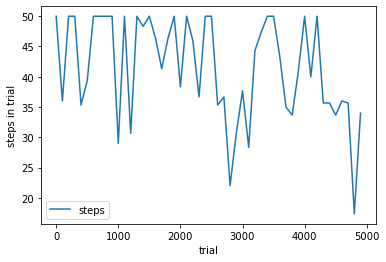

In [27]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


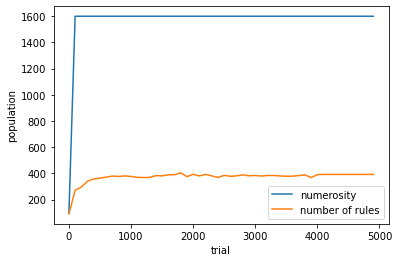

In [28]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.